# Searching for an area with the highest vacancy rate
###### to commit arson

**The dataset I explored was the amount of vacant addresses in Pittsburgh. My thought process was that if there is a neighborhood with a lot of empty houses, there will be less witnesseses to report to authorities. The dataset actually had vacancy rates for the entire state so I had to create a filter to only sort the data that was in the city of Pittsburgh.**

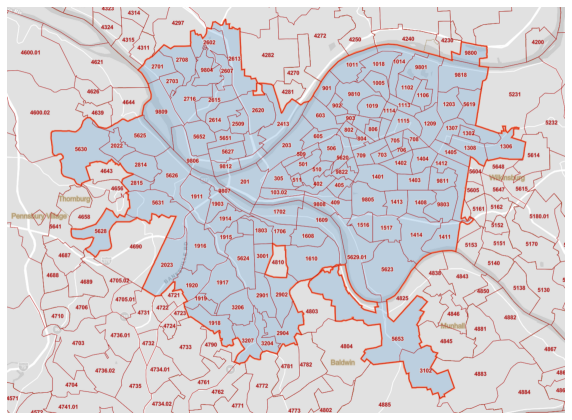

Text(0.5, 1.0, 'Highest Percent of Vacant Houses in Pittsburgh')

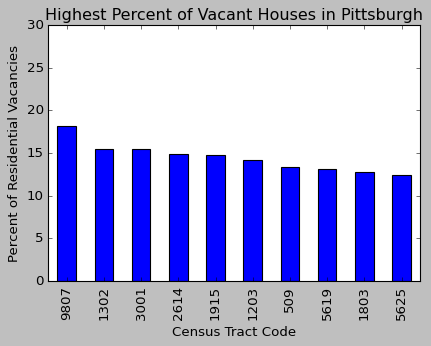

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")

vacant_county = pd.read_csv("vacant.csv")
vacant_county = pd.read_csv("vacant.csv")
img = mpimg.imread('pittcensus.png')
fig, pittcensus = plt.subplots(figsize=(10,10))
pittcensus.imshow(img)
pittcensus.axis('off')
plt.show()

vacant_county['Tract1'] = vacant_county['Tract1'].astype(str).str.rstrip('00')
vacant_county.to_csv('vacant_county_updated.csv', index=False)
vacant_county_updated = pd.read_csv('vacant_county_updated.csv')

pitt_filter = pd.read_csv('PittCensusCode.csv')
vacant_filtered = pd.merge(vacant_county_updated, pitt_filter, on='Tract1')
vacant_filtered.to_csv('vacant_pitt.csv', index=False)

vacant_pitt_sorted = vacant_filtered.set_index('Tract1').sort_values('percent of vacant properties', ascending=False)
vacant_pitt_sorted.to_csv('vacant_pitt_sorted.csv', index=False)
vacant_pitt_highest = vacant_pitt_sorted.head(10)
vacant_pitt_highest.to_csv('vacant_pitt_highest.csv', index=False)

vacant_pitt_highest['percent of vacant properties'] = vacant_pitt_highest['percent of vacant properties'].astype(float)*100
plt.style.use('classic')
fig, pittcensus = plt.subplots(figsize=(6,4))
output = vacant_pitt_highest['percent of vacant properties'].plot.bar()
output.set_ylim(bottom=0, top=30)
output.set_ylabel('Percent of Residential Vacancies')
output.set_xlabel('Census Tract Code')
output.set_title('Highest Percent of Vacant Houses in Pittsburgh')

**This graph shows the percent of vacancies in each defined census tract area within Pittsburgh. However, the percent chart can be misleading.**

Text(0.5, 1.0, 'Number of Vacant Houses in Pittsburgh')

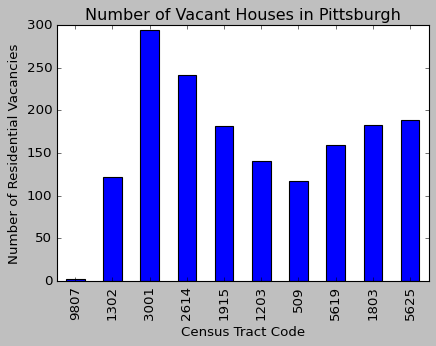

In [6]:
plt.style.use('classic')
fig, pittcensus = plt.subplots(figsize=(6,4))
output2 = vacant_pitt_highest['ResidentialVacancies'].plot.bar()
output2.set_ylabel('Number of Residential Vacancies')
output2.set_xlabel('Census Tract Code')
output2.set_title('Number of Vacant Houses in Pittsburgh')

**Looking at the actual number of vacant buildings, the place with the highest percent has only 11 buildings, so this may not be the best neighborhood. But by combining the two facotrs I ranked the top 5 neighborhoods with the highest percent and number of vacancies.**

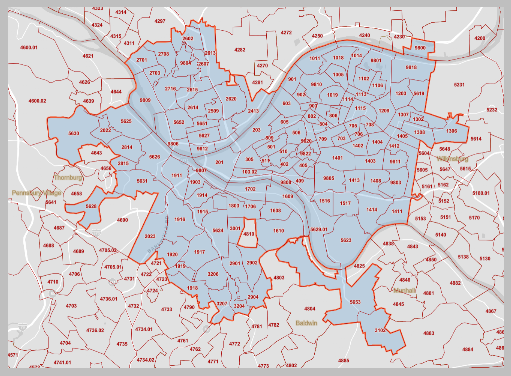

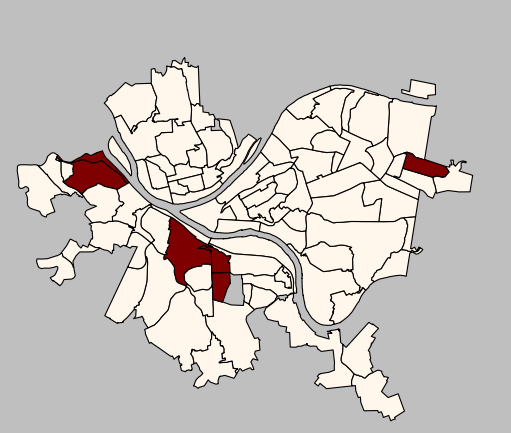

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

vacant_county = pd.read_csv("vacant.csv")
img = mpimg.imread('pittcensus.png')
fig, pittcensus = plt.subplots(figsize=(8,8))
pittcensus.imshow(img)
pittcensus.axis('off')
plt.show()

# Load the shapefile of Pittsburgh
pittsburgh = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

# Create a new column that indicates which areas should be highlighted
pittsburgh['highlight'] = False
pittsburgh.loc[pittsburgh['hood'].isin(['Knoxville', 'Homewood North', 'Mount Washington', 'Allentown', 'Esplen', 'Sheraden']), 'highlight'] = True

# Plot the map with the highlighted areas
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
pittsburgh.plot(column='highlight', cmap='OrRd', edgecolor='black', ax=ax)

# Show the map
plt.show()

#### Based on the two graphs, the most vacant neighborhoods in Pittsburgh are:
1. 3001 - Knoxville
2. 1302 - Homewood North
3. 1915 - Mount Washington
4. 1803 - Allentown
5. 5625 - Esplen/Sheraden

### Conclusion ###

The places with the highest combination of percent and number of vacant houses would be optimal for committing arson as there will be more empty properties and less chance of being spotted. I don't have a favorite neighborhood so as long as the neighborhoods here at the univeristy are not the "best place to comit arson," I'm satisfied.

